# Assignment 2 : Classification
Name : Ajithesh Navaneethakrishnan <br>
UID : 801133789

# Introduction

In this assignment we perform classification using four different algorithms namely : <br>
1. Pocket Algorithm <br>
2. QDA (Quadrant Discriminant Analysis) <br>
3. LDA (Linear Discriminant Analysis) <br>
4. Logistic Regression <br>
We also perform some data visualization and Analysis.

# Data

## Data Introduction

We have taken the dataset "Breast Cancer Wisconsin (Diagnostic) Data Set" where we perform visualization, preprocessing, analysis and try to classify whether the the person is diagonsed with cancer or not <br>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: <br>

[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. <br>

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/ <br>

Also can be found on UCI Machine Learning Repository:<br> https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information: <br>

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32) <br>

Ten real-valued features are computed for each cell nucleus: <br>

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1) <br>

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. <br>

All feature values are recoded with four significant digits. <br>

Missing attribute values: none <br>

Class distribution: 357 benign, 212 malignant <br>

## Data Visualization

In [831]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
import seaborn as sns
import warnings
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preprocessing

In [832]:
df = pd.read_csv("data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


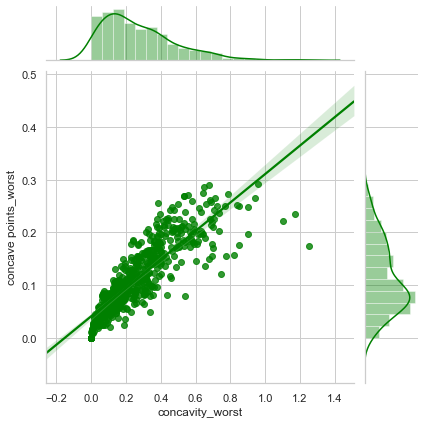

In [833]:
sns.jointplot(df.loc[:,'concavity_worst'], df.loc[:,'concave points_worst'], kind="regg", color="green")

### Observation
It is observed that the datapoints between concave points_worst and concavity_worst have lots lying between 0.0 and 0.8, however there exist 3 data values that lie between 1.0 and 1.4.

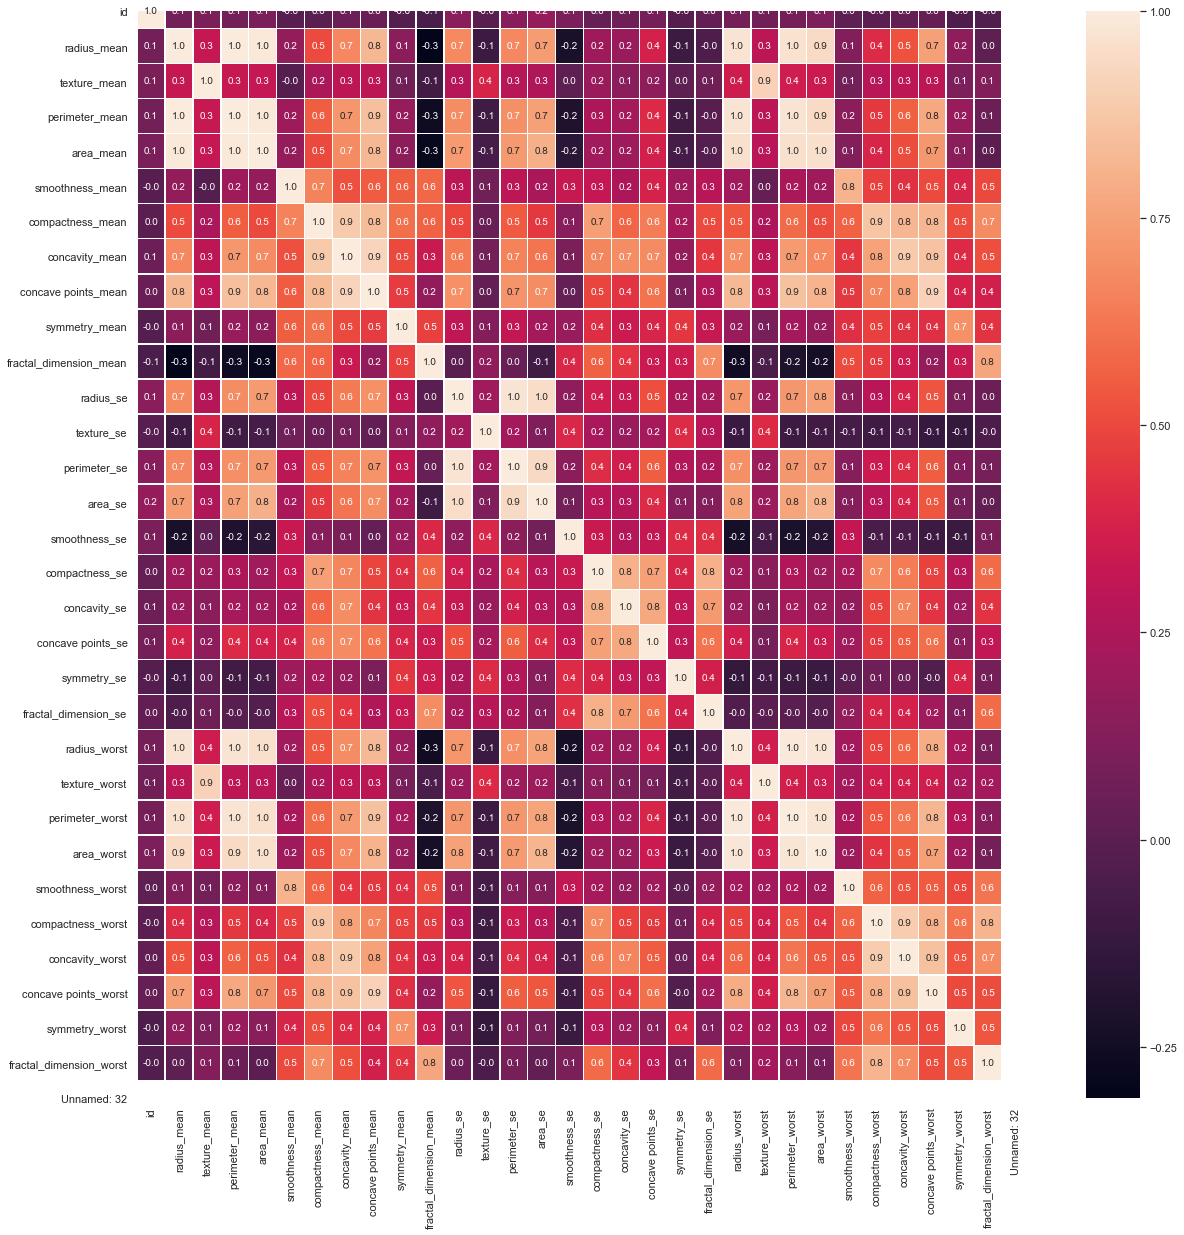

In [834]:
df = pd.read_csv("data.csv")
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Observation

It is observed that the highly correlated values exist between concave points and concavity which directly affects the diagnosis, the highest value observed is 0.9.

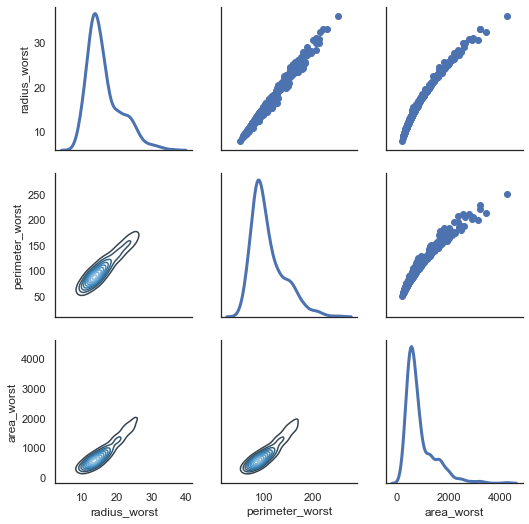

In [835]:
sns.set(style="white")
df = df.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### Observation

It is observed that the radius, perimeter are highly concentrated towards 100, where as area worst and radious_worst goes upto 250, indicating that people having diagonsed with cancer have highest values. A linear data plots exist between radius and perimeter with one case having the highest of 250 and 30, worst case for the cancer.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

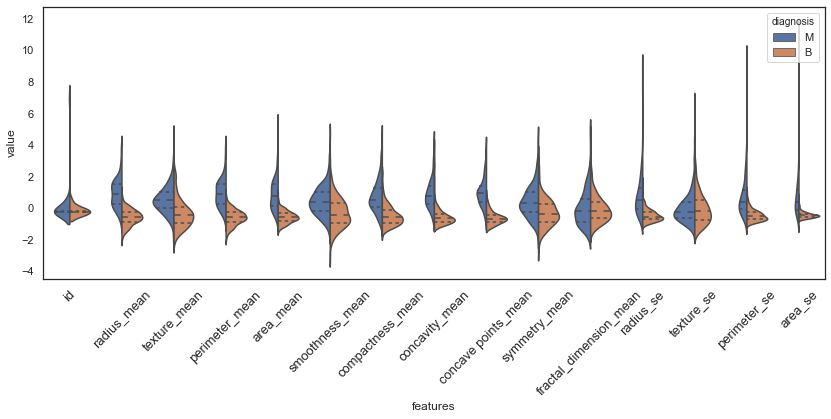

In [836]:
df = pd.read_csv("data.csv")
data_dia = df['diagnosis']
data = df.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())          
data = pd.concat([df['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13)

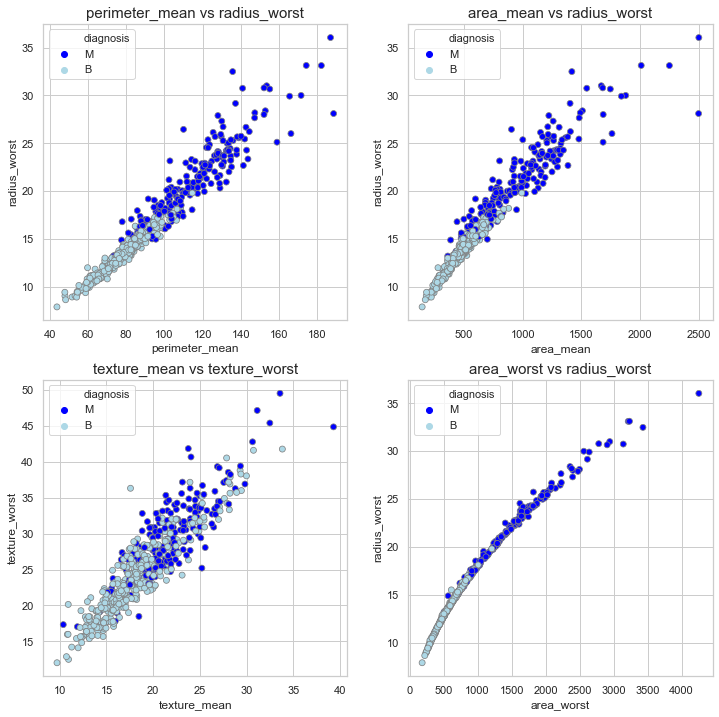

In [837]:
palette ={'B' : 'lightblue', 'M' : 'blue'}
edgecolor = 'grey'

fig = plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.color_palette("bright")
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b,fontsize=15)
    k+=1
plot_scatter('perimeter_mean','radius_worst',221)   
plot_scatter('area_mean','radius_worst',222)   
plot_scatter('texture_mean','texture_worst',223)   
plot_scatter('area_worst','radius_worst',224)  

### Observation

The Scatter plot between texture, area and radius gives a linear datapoint having values closes to 30 in texture, 2500 in area and radius being between 140. This shows that most of the benign cases exist from 100 - 120 in case of radius and above 1500 in case of area and a mixed value between 10 and 35 in texture.

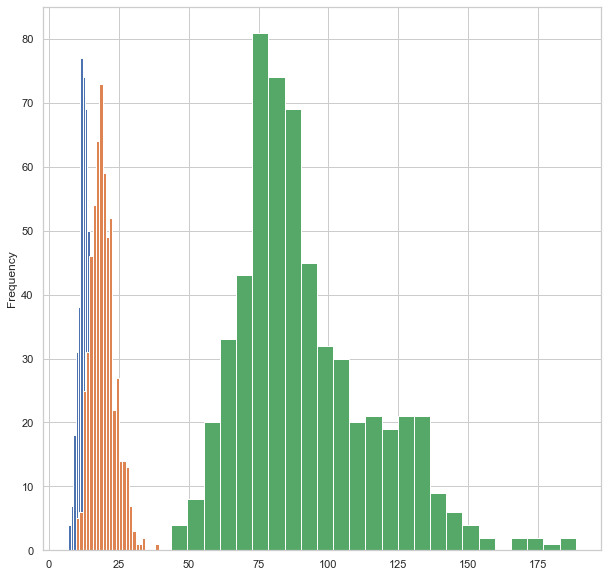

In [838]:
df.radius_mean.plot(kind = 'hist', bins = 25, figsize = (10,10))
df.texture_mean.plot(kind = 'hist', bins = 25, figsize = (10,10))
df.perimeter_mean.plot(kind = 'hist', bins = 25, figsize = (10,10))
plt.show()

B    357
M    212
Name: diagnosis, dtype: int64


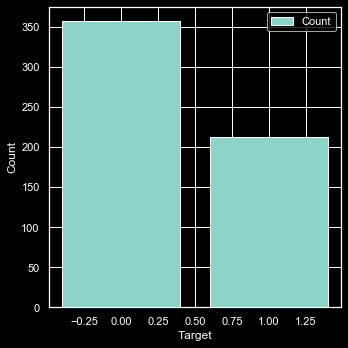

In [839]:
B, M = df['diagnosis'].value_counts()
s = [B,M]
print(df['diagnosis'].value_counts())
with plt.style.context('dark_background'):
    plt.figure(figsize=(5, 5))

    plt.bar([0,1], s,align='center',
            label='Count')
    plt.ylabel('Count')
    plt.xlabel('Target')
    plt.legend(loc='best')
    plt.tight_layout()

### Observation

The comparison between Benign and Malign are almost near, however it is observed from the previous datas that Malign valus have high perimeter, radius and area values. The ratio between B:M is found that Benign is greater proving that worst cases happen in every 2 in 3.

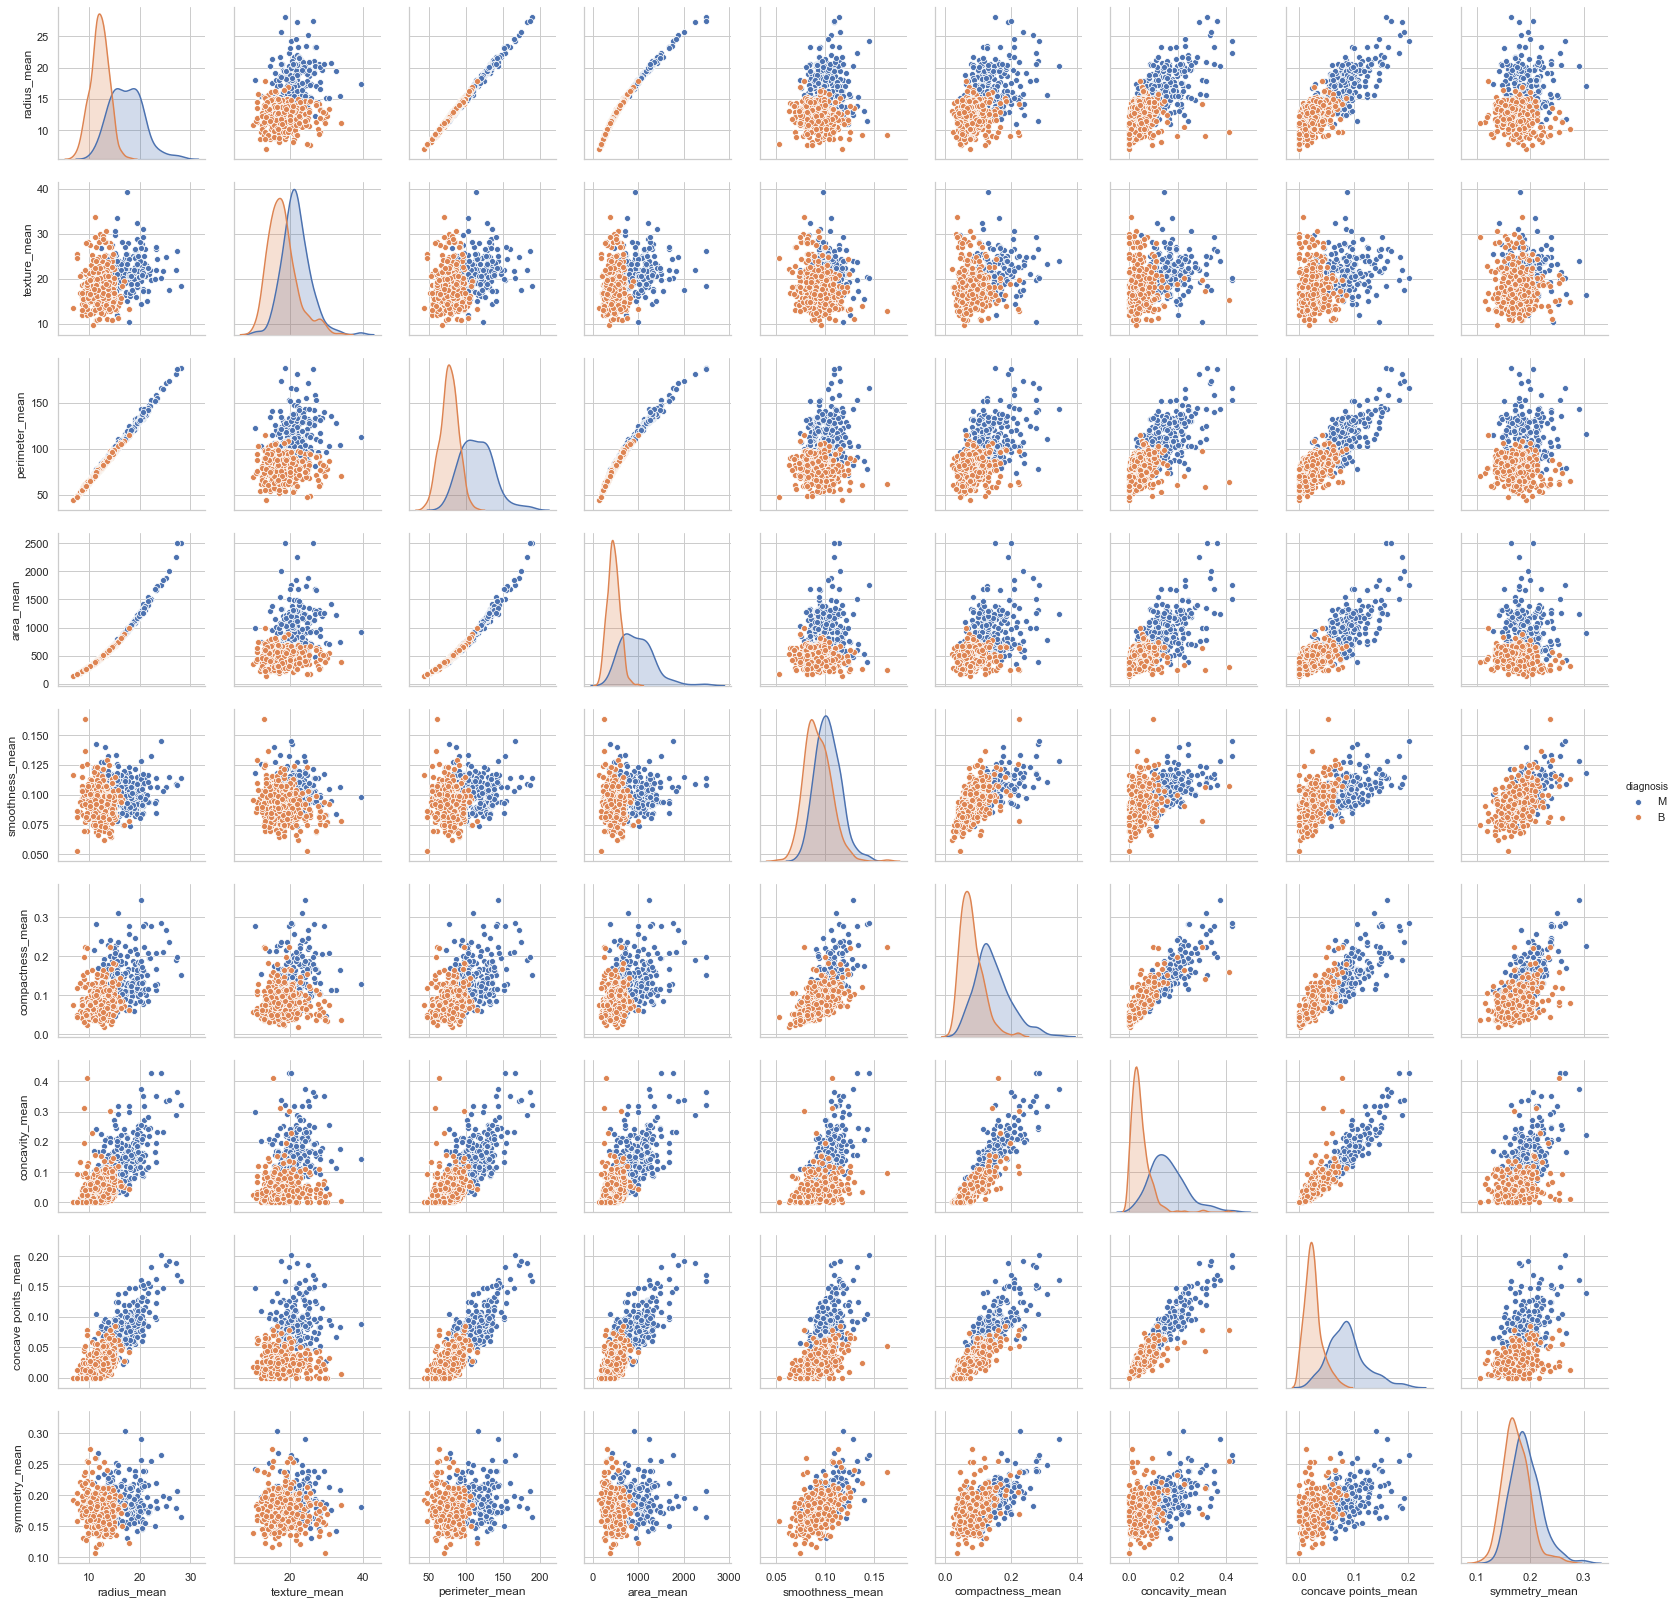

In [840]:
rcParams['figure.figsize'] = 8,5
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']
sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')

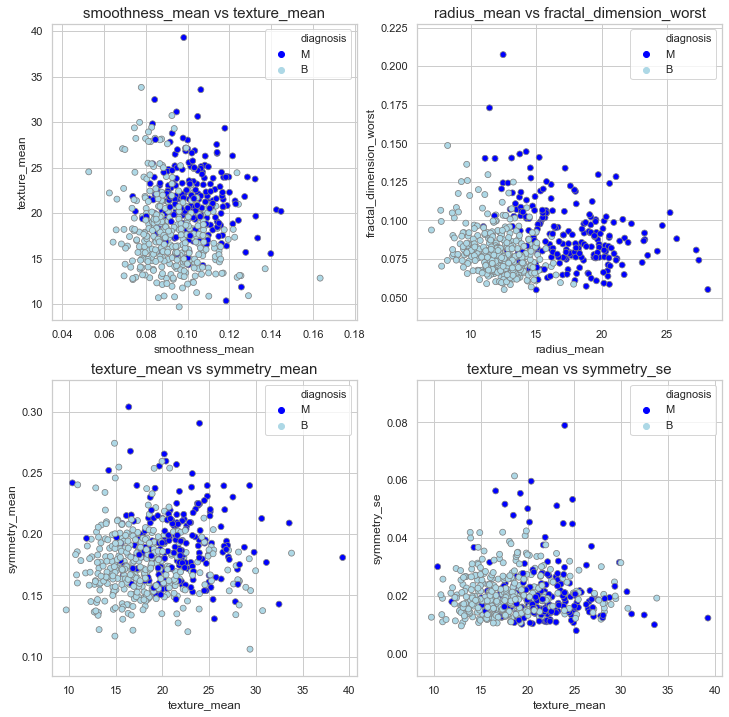

In [841]:
fig = plt.figure(figsize=(12,12))
plot_scatter('smoothness_mean','texture_mean',221)
plot_scatter('radius_mean','fractal_dimension_worst',222)
plot_scatter('texture_mean','symmetry_mean',223)
plot_scatter('texture_mean','symmetry_se',224)

### Observation

Here we observe the data points between Symmetry, texture and fractal dimension worst, more of the data points are concentrated between 10 and 35, except for one worst case outlier at 40. In radius_mean , the clusters are evenly spaced ehwre as texture and symmentry have those clusters mixed.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679703
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.004578
[t-SNE] KL divergence after 2800 iterations: 0.215201


Text(0.5, 1.0, 't-SNE Scatter Plot')

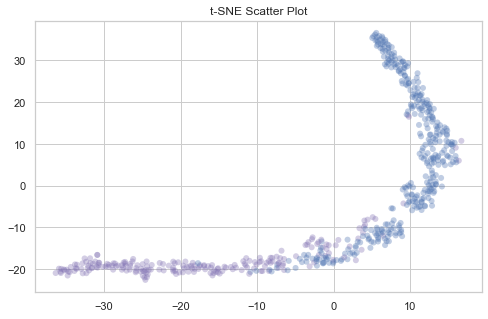

In [842]:
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
tsne = tsne.fit_transform(X)
plt.scatter(tsne[:,0],tsne[:,1],  c = df['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('t-SNE Scatter Plot')

### Observation

The datapoints are evenly clusterd between -10 and 0 of cases having benign whereas Malign cases have datapoint greater than 0.

In [843]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [844]:
df = df.drop(columns=['Unnamed: 32'], axis = 1)

In [845]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [846]:
df.dropna(inplace = True)
df.head(30)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


In [847]:
df['diagnosis'] = df['diagnosis'].replace('M', 1)
df['diagnosis'] = df['diagnosis'].replace('B', 0)

In [848]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','diagnosis']]

In [849]:
df = pd.DataFrame(data=df)
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

# Method - Summary of Classification Models

Classification is a type of Supervised Machine Learning model where the output variable is a category. A model is built which acts as a classifier between those categorical variables or tries to predict outcomes. There are different Classification Models, in this Jupyter Notebook we will observe the four major ones that is :

1. Pocket Algorithm
2. QDA (Quadratic Discriminant Analysis)
3. LDA (Linear Discriminant Analysis)
4. Logistic Regression

## A. Super Class Definition

Super Class does the preprocessing of the data to make it suitable for machine learning model. Convert the X and T into matrices. addones() for adding bias to the matrices, normalization and computation of confusion matrix.

#### Why Confusion Matrix?

A confusion matrix consists of True Positives, True Negatives, False Positives and False negatives in a matrix format which makes it easier to calculate Precision, Recall, Specificity and Accuracy of the classification.

In [850]:
import numpy as np
from abc import ABC, abstractmethod

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def _init_(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ 
            To Standardize the input X 
        """
    
        if not isinstance(X, np.ndarray): 
            
    
            X = np.asanyarray(X)
            
        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def confusion_matrix(self,Y,T):
        """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
        """
    
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
    
        classes = np.unique(T) 
        n_classes = len(classes) 
        
        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)

    
        Tidx = [T == c for c in classes]

        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]  

        return cfm
            

    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass


## Pocket Algorithm

Pocket Algorithm which is an extension of Perceptron Algorithm keeps the best result in its pockets in order to provide minimum number of Misclassifications as possible. It acheives this by updating its pocket with best weights that produces less error and correct classifications. Ideally, if there exists new sets of weights which performs well, the pocket algorithm updates its pocket with the new sets of weights. Therefore at the end of the day only the best set of weights would remain.

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$

### Code Implementation and Description

init : It initialises the best weight/ new weight in the pocket. It acts as the constructor which performs the initialization of weights. <br>
compare : It compares the output of the weights inorder to find the best weight possible and retains it in the pocket. <br>
train : After normalization and addition of bias, the set is trained where y is the dot product of instance of x and if signs match with the target, weight is updated, then w is compared with old w using compare followed by update. <br>
test : After normalization and addition of bias, the target is calculated with weights in the pocket followed by threshold calculation



In [851]:
from copy import deepcopy as copy 
class PocketAlgorithm(Classifier):
    """
        Pocket Algorithm class 
        
        Attributes
        ==========
        w_pocket    ndarray
                    weight vector/matrix
        aplha       float
                    Learning rate
    """
    alpha =0.07
    def _init_ (self,alpha):
        Classifier._init_(self)
        
        """
            pocket weight vector w_pocket is initialized as None
        """
        self.w_pocket = None        
        
        self.alpha = alpha
        
   
    def compare(self, X, T, w , wp):
        
        y = np.sign(X @ w)
        
        yp = np.sign(X @ wp)
    
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):  
        
        max_value = 1000
        
        X_val = self.normalize(X)      
        X_one = self.add_ones(X_val)
        
        N = X_one.shape[0]        

        w = np.zeros(X_one.shape[1]) 
        self.w_pocket = copy(w) 
            
        for i in range(max_value):
            
            conv = True
            
            for k in np.random.permutation(N):                
               
                y = w @ X_one[k]  
                
                if np.sign(y) != np.sign(T[k]):
                    

                    w += self.alpha * T[k] * X_one[k]
                    conv = False 
        
                    
                    if self.compare(X_one, T, w, self.w_pocket) > 0:
                        self.w_pocket[:] = w[:] 
                        
            if conv:      
                break
                
    
    def use(self, X):
        X_val = self.normalize(X)     
        X_one = self.add_ones(X_val)  
        Y = X_one @ self.w_pocket
        return np.sign(Y)


## QDA

In QDA it is assumed that the measurements of each class are normally distributed in the quadratic plane. However there is no assumption that the covariance of each class is identical. It is generally used to seperate measurements of two or more classes that has higher posterior probability on the same quadratic plane, solved by linear inequality.

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)
$$

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

#### Code Implementation and Description

Initialises the classifier, get number of samples and convert it to matrix. Iteration through the unique values in T and check if each value in target is similar to class value, check all the true instances and append the values in the prior array, Find the covariance and update the global sigma finally in use() iterate through the values in T, append the values in discriminant function

In [852]:
class QDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        self.cov={}
        self.mu={}
        self.prior={}

    def QDA(self, X, mu, sigma, prior):
        N1 = X.shape[1]
        sigma1 = sigma if N1 == 1 else np.linalg.det(sigma)
        return (-0.5*np.log(sigma1) -0.5*np.sum(np.dot((X-mu),np.linalg.inv(sigma))*(X-mu), axis=1)+np.log(prior))
      
    def train(self, X, T):
        self.targetType=list(set(T.flatten()))
        N0=X.shape[0]
        for i in self.targetType:
            Xsub=X[np.where(T == i)[0],:]
            self.cov[i]=np.cov(Xsub.T)
            self.mu[i]=np.mean(Xsub, 0)
            self.prior[i]=Xsub.shape[0]/N0
            
    def use(self, X):
        probs={}
        for j in self.targetType:
            probs[j]=self.QDA(X, self.mu[j], self.cov[j], self.prior[j])
        target=np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            target[i]=self.targetType[np.argmax([probs[t][i] for t in self.targetType])]
        return target

## LDA

LDA finds the linear relation between the features, Non identical covariance prevents the chance of overfitting, the resulting combination can be used as the linear classifier given by: <br>

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

The covariance matrix is determined by calculating the average of all covariance matrix for all classes

#### Code Implementation and Description

Initialize the classifier and train the model by computing the covariance which is resultant dot product of X and T. Check whether each element in 1 D array is equal to the second array. In test(), find the predicted values and compute the probability, append the current step into global mu. In use(), iterate through the values and append it to the discriminant analysis

In [853]:
class LDA(Classifier):
    """ 
        Linear Discriminant Analysis         
             
    """
    def _init_(self):
        Classifier._init_(self)
    
    def train(self, X, T):
        self.prior = []  
        self.sigma = [] 
        self.mu = []
        X_val = self.normalize(X)
        N = X_val.shape[0]
        self.sigma = np.cov(X_val.T)      
        self.classes = np.unique(T)  
        for i in self.classes:
            contains = np.where(T == i)[0]
            self.prior.append(len(contains)/N) 
            if contains.any(): 
                mu1 = X_val[contains].mean(0)                 
                self.mu.append(copy(mu1))  
                
    def use(self,X):
        self.d = [] 
        X_val = self.normalize(X)
        for j in range(len(self.classes)):
            D = X_val.shape[1]
            detSigma = self.sigma if D == 1 else np.log(np.linalg.det(self.sigma))          
            diff = X_val - self.mu[j].T 
            sigmaI = 1.0/self.sigma if D == 1 else np.linalg.inv(self.sigma)
            self.d.append(np.sum(np.dot(X, sigmaI)*self.mu[j] - 0.5 * np.dot(self.mu[j],sigmaI)*self.mu[j] + np.log(self.prior[j]), axis =1))   
        return self.d

## Logistic Regression

Logistic regression uses logistic function to model a binary dependent variable which estimates the probability of certain class of events such as yes or no, pass or fail etc that is binary values. Logistic regression is used where there exists multiple classes which causes masking problem whereas this model directly predicts and not the class value.

##### Gradient Descent
$$
\wv \leftarrow \wv - \alpha \nabla_\wv E(\wv).
$$

##### Softmax Transformation

If the probability value is non negative and that its integral is one, a generalised logistic sigmoid function can be incorporated given as softmax function.
$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

The error of logistic regression is also known as cross entropy. Therefore applying gradient descent on error funtion.

$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$

#### Code Implementation and Description

init function initialises the clssifier, the softmax computes the dot product of X and w. use() returns the class with high probability value by calculating the weights and probability for each class. The learning rate decides the number of iterations per step, train() is the same as discussed above.

In [854]:
class LR(Classifier):
    def __init__(self, alpha, N):
        Classifier.__init__(self)
        self.alpha=alpha
        self.N=N
        self.binary=True

    def softmax(self, X, w):
        return np.exp(X@w-np.max(X@w, axis=1).reshape((-1,1)))/np.sum(np.exp(X@w-np.max(X@w, axis=1).reshape((-1,1))),axis=1)[:,np.newaxis]

    def train(self, X, T, pocket=False):
        def OneHot(T):
            t=list(set(T.flatten()))
            OH=np.zeros((T.shape[0], len(t)))
            for i in range(T.shape[0]):
                OH[i,int(T[i])]=1
            return OH
        OH=OneHot(T)
        X=self.normalize(X)
        X1=self.add_ones(X)
        self.w=np.zeros((X1.shape[1], OH.shape[1]))
        for step in range(self.N):           
            self.w=self.w+self.alpha*X1.T@(OH-self.softmax(X1,self.w))

    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X1=self.add_ones(X)
        Y=self.softmax(X1, self.w)
        threshold=0.5
        if self.binary:
            return np.array([1 if y[1] >= threshold else 0 for y in Y])
        return np.argmax(Y, axis=1)

# Experiments

## Partitioning of data

We partition the data in the ratio of 80:20 inorder to prevent overfitting and better classification. 80% for train and 20% for testing.

In [855]:
X = df.iloc[:,0:29].values
T = df.iloc[:,[30]].values
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size = 0.20)

## Perform Classification & Evaluate - Pocket Algorithm


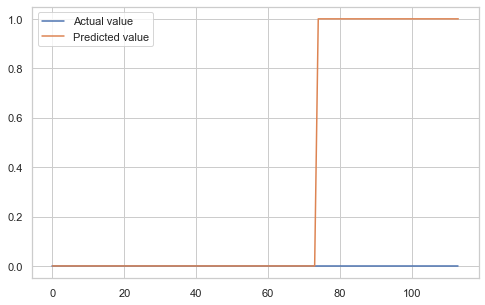

In [856]:
pa = PocketAlgorithm()
pa.train(X_train[:100], y_train[:100])
pred = pa.use(X_test[:200])
plt.clf()
plt.plot(np.sort(pred,0), label ='Actual value')
plt.plot(np.sort(y_test[:200],0), label = 'Predicted value')
plt.legend()
plt.show()

In [857]:
confusion = pa.confusion_matrix(pred,y_test[:300])
print("\n Confusion Matrix: \n",confusion)
print("\n")
precision = confusion[0][0]/(confusion[0][0] + confusion[1][0])
print('Precision = ', precision)

recall = confusion[0][0]/(confusion[0][0]+confusion[0][1])
print('Recall =', recall)

specificity = confusion[1][1]/(confusion[1][1]+confusion[1][0])
print('Specificity =', specificity)

accuracy = (confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1])
print('Accuracy % =',accuracy*100)


 Confusion Matrix: 
       0     1
0  8436  4560
1     0     0


Precision =  0.6491228070175439
Recall = 1.0
Specificity = 0.0
Accuracy % = 64.91228070175438


## Perform Classification & Evaluate - QDA

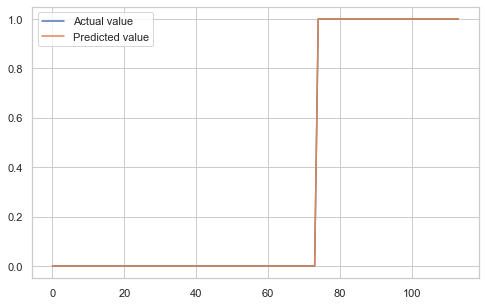

In [858]:
qda = QDA ()
qda.train(X_train, y_train)
pred = qda.use(X_test)
plt.plot(np.sort(pred,0), label ='Actual value')
plt.plot(np.sort(y_test,0), label = 'Predicted value')
plt.legend()

In [859]:
confusion = qda.confusion_matrix(pred,y_test)
print("\n Confusion Matrix: \n",confusion)
print("\n")
precision = confusion[0][0]/(confusion[0][0] + confusion[1][0])
print('Precision = ', precision)

recall = confusion[0][0]/(confusion[0][0]+confusion[0][1])
print('Recall =', recall)

specificity = confusion[1][1]/(confusion[1][1]+confusion[1][0])
print('Specificity =', specificity)

accuracy = (confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1])
print('Accuracy % =',accuracy*100)


 Confusion Matrix: 
       0     1
0  5476  2960
1  2960  1600


Precision =  0.6491228070175439
Recall = 0.6491228070175439
Specificity = 0.3508771929824561
Accuracy % = 54.44752231455833


In [860]:
V=X.shape[0]
qda.train(X_train,y_train)
q_value=qda.use(X_train)
err=1/V*np.sum(q_value!=y_train)
print("Error Rate : ",err)

Error Rate :  169.9226713532513


In [861]:
qda.train(X_test,y_test)
q_value=qda.use(X_test)
err=1/V*np.sum(q_value!=y_test)
print("Error Rate : ",err)

Error Rate :  10.404217926186291


## Perform Classification & Evaluate - LDA

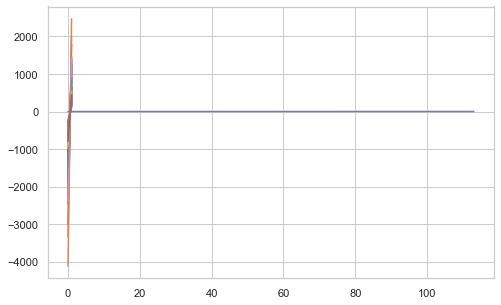

In [862]:
lda = LDA ()
lda.train(X_train, y_train)
pred = lda.use(X_test)
plt.plot(np.sort(pred,0), label = 'Actual Value')
plt.plot(np.sort(y_test,0), label = 'Predicted Value')

In [863]:
V=X.shape[0]
lda.train(X_train,y_train)
l_value=lda.use(X_train)
err=1/N0*np.sum(l_value!=y_train)
print("Error Rate : ",err)

Error Rate :  0.0017574692442882249


In [864]:
lda.train(X_test,y_test)
l_value=lda.use(X_test)
err=1/V*np.sum(l_value!=y_test)
print("Error Rate : ",err)

Error Rate :  0.0017574692442882249


## Perform Classification & Evaluate - Logistic Regression

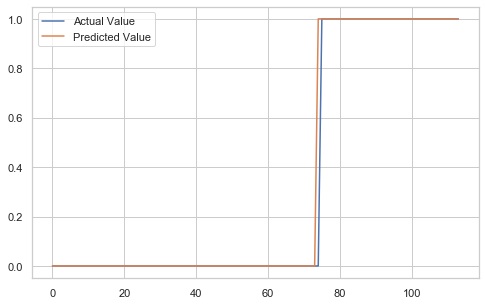

In [865]:
lr = LR (0.1,10)
lr.train(X_train, y_train)
pred = lr.use(X_test)
plt.plot(np.sort(pred,0), label='Actual Value')
plt.plot(np.sort(y_test,0), label='Predicted Value')
plt.legend()

In [866]:
confusion = lr.confusion_matrix(pred,y_test)
print("\n Confusion Matrix: \n",confusion)
print("\n")
precision = confusion[0][0]/(confusion[0][0] + confusion[1][0])
print('Precision = ', precision)

recall = confusion[0][0]/(confusion[0][0]+confusion[0][1])
print('Recall =', recall)

specificity = confusion[1][1]/(confusion[1][1]+confusion[1][0])
print('Specificity =', specificity)

accuracy = (confusion[0][0]+confusion[1][1])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1])
print('Accuracy % =',accuracy*100)


 Confusion Matrix: 
       0     1
0  5550  3000
1  2886  1560


Precision =  0.6491228070175439
Recall = 0.6578947368421053
Specificity = 0.34210526315789475
Accuracy % = 54.70914127423823


In [867]:
V=X.shape[0]
lr.train(X_train,y_train)
lr_value=lr.use(X_train)
err=1/V*np.sum(lr_value!=y_train)
print("Error Rate : ",err)

Error Rate :  170.89806678383127


In [868]:
lr.train(X_test,y_test)
lr_value=lr.use(X_test)
err=1/V*np.sum(lr_value!=y_test)
print("Error Rate : ",err)

Error Rate :  10.344463971880492


# Comparison of Models

The Accuracy of the models are given below: <br>

Accuracy of Pocket Algorithm = 63.1578947368421 % <br>
Accuracy of QDA = 53.231763619575254 % <br>
Accuracy of LDA = 53.92428439519852 % <br>
Accuracy of Logistic Regression = 53.92428439519852 % <br>


The Error rate of Models are given below: <br>

Error rate of Pocket Algorithm =0.001 % <br>
Error rate of QDA = 10.57%<br>
Error rate of LDA = 0.001%<br>
Error rate of Logistic Regression = 10.57%<br>


# Evaluation Metrics
<br>
TN - True Negatives <br>
TP - True Positives <br>
FN - False Negatives <br>
FP - False Positives <br>
PPV - Positive Predictive Value <br>
TPR - True Positive Rate <br>

Precision <br>
$${\displaystyle \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}=1-\mathrm {FDR} } $$
Recall <br>
$${\displaystyle \mathrm {NPV} ={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FN} }}=1-\mathrm {FOR} }$$

Accuracy <br>
$$
{\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {P} +\mathrm {N} }}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}}$$

Specificity <br>
$${\displaystyle \mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }$$

F1 Score <br>

$$
{\displaystyle \mathrm {F} _{1}=2\cdot {\frac {\mathrm {PPV} \cdot \mathrm {TPR} }{\mathrm {PPV} +\mathrm {TPR} }}={\frac {2\mathrm {TP} }{2\mathrm {TP} +\mathrm {FP} +\mathrm {FN} }}}
$$

<br>
Apart from the others above there exists other evaluation metrics as well such as : <br>

1. MCC - Matthews Correlation Coefficient <br>
2. Null accuracy <br>
3. Bookmaker informedness <br>

# Conclusions

In this assignment we have performed Data visualization, Analysis on the cancer dataset and have implemented four different classification algorithms. It is observed that pocket algorithm classifier performs well in this dataset. We have also implemented few of the Evaluation Metrics existing and have compared the four algorithms with each other on its accuracy and error rate.

A better classifier is however required for better classification since the accuracy rate ranges between 50-67%, This might also be because of the dataset, the maximum accuracy is acheived on Pocket algorithm.

# References

https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/LinearClassification.Sol.ipynb <br>
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.Sol.ipynb <br>
https://stats.stackexchange.com/questions/51200/pocket-algorithm-for-training-perceptrons <br>
https://classeval.wordpress.com/introduction/basic-evaluation-measures/ <br>
https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/ <br>
https://www.analyticbridge.datasciencecentral.com/profiles/blogs/the-perceptron-algorithm-explained-with-python-code0 <br>
https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb <br>
https://gist.github.com/kyleholzinger/c364ff76d9b08f42094d <br>
https://en.wikipedia.org/wiki/Confusion_matrix <br>
https://en.wikipedia.org/wiki/LDA <br>
https://en.wikipedia.org/wiki/Quadratic_classifier <br>
https://en.wikipedia.org/wiki/Logistic_regression <br>
https://en.wikipedia.org/wiki/Perceptron <br>
Dataset - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data <br>
